In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
from tensorflow.python.framework import ops
import xgboost as xgb
from sklearn.model_selection import train_test_split
%matplotlib inline

In [51]:
train = pd.read_csv("datasets/digit/train.csv")
test = pd.read_csv('datasets/digit/test.csv')

In [58]:
X_train=train
X_test=test
Y_train=train["label"]

# XGB

In [56]:
import time
start_time = time.time()

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)

## My xgboost

In [83]:
y = Xtrain.label
X = Xtrain.drop(['label'],axis=1)
val_y = Xtest.label
val_X = Xtest.drop(['label'],axis=1)

In [84]:
xgb_val = xgb.DMatrix(val_X, label = val_y)
xgb_train = xgb.DMatrix(X, label = y)
xgb_test = xgb.DMatrix(test)

In [ ]:
params = {
    'booster':'gbtree',
'objective': 'multi:softmax', #多分类的问题
'num_class':10, # 类别数，与 multisoftmax 并用
'gamma':0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
'max_depth':12, # 构建树的深度，越大越容易过拟合
'lambda':2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
'subsample':0.7, # 随机采样训练样本
'colsample_bytree':0.7, # 生成树时进行的列采样
'min_child_weight':3, 
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
'eta': 0.007, # 如同学习率
'seed':1000,
'nthread':7,# cpu 线程数
#'eval_metric': 'auc'
}
plst = list(params.items())
num_rounds = 5000
watchlist = [(xgb_train, 'train'), (xgb_val, 'val')]

model = xgb.train(plst, xgb_train, num_rounds, watchlist,early_stopping_rounds=100)
model.save_model('./model/xgb.model')
print("best best_ntree_limit", model.best_ntree_limit)

[0]	train-merror:0.086293	val-merror:0.125238
Multiple eval metrics have been passed: 'val-merror' will be used for early stopping.

Will train until val-merror hasn't improved in 100 rounds.
[1]	train-merror:0.062891	val-merror:0.098333
[2]	train-merror:0.054898	val-merror:0.087302
[3]	train-merror:0.050238	val-merror:0.080397
[4]	train-merror:0.047245	val-merror:0.078333
[5]	train-merror:0.046497	val-merror:0.07619
[6]	train-merror:0.044014	val-merror:0.074444
[7]	train-merror:0.043673	val-merror:0.072143
[8]	train-merror:0.042959	val-merror:0.072063
[9]	train-merror:0.042279	val-merror:0.071508
[10]	train-merror:0.041395	val-merror:0.070159
[11]	train-merror:0.040952	val-merror:0.070159
[12]	train-merror:0.040442	val-merror:0.070794
[13]	train-merror:0.039864	val-merror:0.068968
[14]	train-merror:0.039728	val-merror:0.068413
[15]	train-merror:0.039558	val-merror:0.067857
[16]	train-merror:0.038912	val-merror:0.067619
[17]	train-merror:0.038776	val-merror:0.06746
[18]	train-merror:0.

[171]	train-merror:0.019354	val-merror:0.050556
[172]	train-merror:0.019252	val-merror:0.050476
[173]	train-merror:0.019218	val-merror:0.050556
[174]	train-merror:0.019082	val-merror:0.050635
[175]	train-merror:0.019014	val-merror:0.050397
[176]	train-merror:0.018946	val-merror:0.050476
[177]	train-merror:0.018844	val-merror:0.050317
[178]	train-merror:0.01881	val-merror:0.050317
[179]	train-merror:0.018878	val-merror:0.050635
[180]	train-merror:0.018571	val-merror:0.050476
[181]	train-merror:0.018537	val-merror:0.050238
[182]	train-merror:0.018469	val-merror:0.050238
[183]	train-merror:0.018503	val-merror:0.050397
[184]	train-merror:0.018401	val-merror:0.050159
[185]	train-merror:0.018435	val-merror:0.050317
[186]	train-merror:0.018333	val-merror:0.050238
[187]	train-merror:0.018299	val-merror:0.050159
[188]	train-merror:0.018197	val-merror:0.050079
[189]	train-merror:0.018197	val-merror:0.050079
[190]	train-merror:0.018163	val-merror:0.049921
[191]	train-merror:0.018163	val-merror:0.

[343]	train-merror:0.011463	val-merror:0.04381
[344]	train-merror:0.011463	val-merror:0.04373
[345]	train-merror:0.011361	val-merror:0.043651
[346]	train-merror:0.011361	val-merror:0.043651
[347]	train-merror:0.011293	val-merror:0.043571
[348]	train-merror:0.011259	val-merror:0.043492
[349]	train-merror:0.011293	val-merror:0.043413
[350]	train-merror:0.011224	val-merror:0.043413
[351]	train-merror:0.01119	val-merror:0.043571
[352]	train-merror:0.011156	val-merror:0.043413
[353]	train-merror:0.011122	val-merror:0.043333
[354]	train-merror:0.011156	val-merror:0.043333
[355]	train-merror:0.011156	val-merror:0.043333
[356]	train-merror:0.011122	val-merror:0.043254
[357]	train-merror:0.01102	val-merror:0.043254
[358]	train-merror:0.010918	val-merror:0.043333
[359]	train-merror:0.010816	val-merror:0.043333
[360]	train-merror:0.010816	val-merror:0.043254
[361]	train-merror:0.010816	val-merror:0.043254
[362]	train-merror:0.010782	val-merror:0.043175
[363]	train-merror:0.01068	val-merror:0.0431

In [ ]:
preds = model.predict(xgb_test, ntree_limit=model.best_ntree_limit)

np.savetxt('xgb_submission.csv', np.c_[range(1,len(tests)+1),preds],delimiter=',',header='ImageId,Label',comments='',fmt='%d')

cost_time = time.time()-start_time
print("xgboost success!",'\n',"cost time:",cost_time,"(s)......")

## xgboost by others

In [61]:
train_xy, val = train_test_split(train, test_size=0.3, random_state=1)

In [66]:
print(val.head())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
29633      1       0       0       0       0       0       0       0       0   
345        5       0       0       0       0       0       0       0       0   
36369      2       0       0       0       0       0       0       0       0   
16624      8       0       0       0       0       0       0       0       0   
14389      4       0       0       0       0       0       0       0       0   

       pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
29633       0    ...            0         0         0         0         0   
345         0    ...            0         0         0         0         0   
36369       0    ...            0         0         0         0         0   
16624       0    ...            0         0         0         0         0   
14389       0    ...            0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783 

# tensorflow

In [26]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.values.reshape(-1)].T
    return Y

In [27]:
X_train=X_train/255
X_test=X_test/255
X_train=X_train.values.reshape(42000,28,28,1)
X_test=X_test.values.reshape(28000,28,28,1)
print(X_train.shape)
print(X_test.shape)
Y_train=convert_to_one_hot(Y_train,10).T
print(Y_train.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)
(42000, 10)


In [28]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [29]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    
    X = tf.placeholder(tf.float32,[None,n_H0,n_W0,n_C0],name="X")
    Y = tf.placeholder(tf.float32,[None,n_y],name="Y")

    
    return X, Y

In [30]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1",[4,4,1,8],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2",[2,2,8,16],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [31]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    Z1 = tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding="SAME")
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1,ksize=[1,8,8,1],strides=[1,2,2,1],padding="SAME")
    Z2 = tf.nn.conv2d(P1,W2,strides=[1,1,1,1],padding="SAME")
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2,ksize=[1,4,4,1],strides=[1,4,4,1],padding="SAME")
    P2 = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(P2,10,activation_fn=None)
    return Z3

In [32]:
def compute_cost(Z3,Y):
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3,labels=Y))
    return cost

In [33]:
def model(X_train, Y_train,X_test, learning_rate = 0.005,
          num_epochs = 150, minibatch_size = 64, print_cost = True):
     
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []
    X, Y = create_placeholders(n_H0,n_W0,n_C0,n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost =compute_cost(Z3,Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                minibatch_cost += temp_cost / num_minibatches
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        parameters = sess.run(parameters)
        correct_predictions = tf.equal(tf.argmax(Y, axis=1), tf.argmax(Z3, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_predictions, 'float'))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        print("Train Accuracy:", train_accuracy)
        Y_test = sess.run(tf.argmax(Z3, 1), feed_dict={X: X_test})

        return Y_test

Cost after epoch 0: 0.275007
Cost after epoch 5: 0.055590
Cost after epoch 10: 0.045429
Cost after epoch 15: 0.036315
Cost after epoch 20: 0.037503
Cost after epoch 25: 0.033304
Cost after epoch 30: 0.030069
Cost after epoch 35: 0.029746
Cost after epoch 40: 0.027328
Cost after epoch 45: 0.023945
Cost after epoch 50: 0.025601
Cost after epoch 55: 0.028416
Cost after epoch 60: 0.026039
Cost after epoch 65: 0.027872
Cost after epoch 70: 0.022534
Cost after epoch 75: 0.022599
Cost after epoch 80: 0.029183
Cost after epoch 85: 0.024307
Cost after epoch 90: 0.029069
Cost after epoch 95: 0.024801
Cost after epoch 100: 0.025686
Cost after epoch 105: 0.023529
Cost after epoch 110: 0.026386
Cost after epoch 115: 0.032709
Cost after epoch 120: 0.023088
Cost after epoch 125: 0.026099
Cost after epoch 130: 0.019448
Cost after epoch 135: 0.021558
Cost after epoch 140: 0.029056
Cost after epoch 145: 0.021231


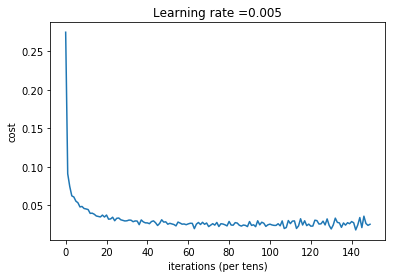

Tensor("Mean_1:0", shape=(), dtype=float32)


ResourceExhaustedError: OOM when allocating tensor with shape[42000,8,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, W1/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: Mean_1/_21 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_54_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'Conv2D', defined at:
  File "C:\Users\45115\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\45115\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\45115\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\45115\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\45115\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\45115\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\45115\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\45115\Anaconda3\lib\asyncio\base_events.py", line 1434, in _run_once
    handle._run()
  File "C:\Users\45115\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\45115\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\45115\Anaconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\45115\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\45115\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\45115\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\45115\Anaconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\45115\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\45115\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\45115\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\45115\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\45115\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\45115\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\45115\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\45115\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\45115\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-f748096b8a05>", line 1, in <module>
    Ytest=model(X_train,Y_train,X_test)
  File "<ipython-input-33-fa4dabf9a973>", line 12, in model
    Z3 = forward_propagation(X,parameters)
  File "<ipython-input-31-44512d431e11>", line 5, in forward_propagation
    Z1 = tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding="SAME")
  File "C:\Users\45115\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 1042, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\Users\45115\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\45115\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\45115\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\45115\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[42000,8,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, W1/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: Mean_1/_21 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_54_Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [42]:
Ytest=model(X_train,Y_train,X_test)